# Advanced Assignment - Python
DEO BRILIANT MUHAMMAD - SECTION AMSTERDAM - FSDA AUG 22

## Business Background

We left you in the Intermediate Assignment as a new joiner in an investment platform startup that is currently focused on app-based mutual fund investment. Now assume you already work for the startup for one month, and now it is the end of October 2021 (in your Intermediate Assignment, you were a new joiner in September). You remember at the z of September 2021, the company was starting to offer government bond investment products, in addition to its existing mutual fund products. Existing users in September responded enthusiastically to the communication program you helped devised (in Intermediate Assignment) YEY!

In early 2022, the company will offer another round of government bond investment. Based on the September bond campaign, the company decided to make further investments and run targeted advertising to existing users in October. However, the budget for the campaign is only enough to serve ads to 30% of the total existing users.

Julia now asks you to rank users based on their likelihood or propensity to buy bonds in the next round. Julia also asks you to give her a projection of how profitable the campaign will be for the company. As the data analyst, you're tasked to provide the leads of the top 30% of most prospective users to be targeted. In addition, you will create a simple benefit-cost analysis of the campaign. In this project, you're supported by Bambang , a senior data analyst in your team.

# Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report, confusion_matrix

## Import datasets

In [2]:
# USER DAILY BALANCE DATA
sheet_url = 'https://docs.google.com/spreadsheets/d/1k9-VIRN3pn6bz-nj_NF_caAFFMG-2QAiKw6J2VCI9WI/edit#gid=1937711853'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_daily = pd.read_csv(sheet_url_trf)
df_daily

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,NaN,NaN,NaN,NaN
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,0.0,NaN,NaN,NaN
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,0.0,NaN,NaN,NaN
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,0.0,NaN,NaN,NaN
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401235,4457532,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401236,4457596,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401237,4457622,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#BOND RESULTS DATA
sheet_url = 'https://docs.google.com/spreadsheets/d/12d0pJ_48gP9KV6gV9wsHeas6BdnuWgFLPYocDWmsivo/edit#gid=1254201307'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_bond_sept = pd.read_csv(sheet_url_trf)
df_bond_sept

,user_id,flag_order_bond,bond_units_ordered
0,50701,1,34
1,50961,1,99
2,51883,0,0
3,53759,0,0
4,54759,1,92
...,...,...,...
8479,4173878,0,0
8480,4174045,0,0
8481,4174169,0,0
8482,4174486,0,0


In [4]:
# USERS DATA
sheet_url = 'https://docs.google.com/spreadsheets/d/1kp5B_4vU-L3wNLj79siKGsZ5VGCd--Of2hD6pJqxHIc/edit#gid=215046850'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_users = pd.read_csv(sheet_url_trf)
df_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


# Preparing users and govt bond results tables and add new columns that will be used in the model

## Create user vintage per 30 sept and 29 oct

In [5]:
df_users['registration_import_datetime'] = pd.to_datetime(df_users['registration_import_datetime'])
df_users['registration_import_datetime'] = df_users['registration_import_datetime'].dt.strftime('%Y-%m-%d')
df_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


In [6]:
# filter to only show users who registered before 30 sept 2021
df_users = df_users[df_users['registration_import_datetime'] <= '2021-09-30']
df_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
5,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,NaN,Gaji
6,1407611,2021-09-23,Male,56,Swasta,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis
...,...,...,...,...,...,...,...,...
14692,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14693,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis
14694,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji
14695,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,Gaji


In [7]:
df_users['vintage_30sept'] = datetime.strptime('2021-09-30', '%Y-%m-%d') - pd.to_datetime(df_users['registration_import_datetime'])
df_users['vintage_30sept'] = df_users['vintage_30sept'].dt.days

df_users['vintage_29oct'] = datetime.strptime('2021-10-29', '%Y-%m-%d') - pd.to_datetime(df_users['registration_import_datetime'])
df_users['vintage_29oct'] = df_users['vintage_29oct'].dt.days

df_users

/var/folders/l9/74jysvns7sn8wk39d1sgfb940000gn/T/ipykernel_14038/358818262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['vintage_30sept'] = datetime.strptime('2021-09-30', '%Y-%m-%d') - pd.to_datetime(df_users['registration_import_datetime'])
/var/folders/l9/74jysvns7sn8wk39d1sgfb940000gn/T/ipykernel_14038/358818262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['vintage_30sept'] = df_users['vintage_30sept'].dt.days
/var/folders/l9/74jysvns7sn8wk39d1sgfb940000gn/T/ipykernel_140

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,vintage_30sept,vintage_29oct
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,13,42
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,49,78
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,46,75
5,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,NaN,Gaji,32,61
6,1407611,2021-09-23,Male,56,Swasta,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis,7,36
...,...,...,...,...,...,...,...,...,...,...
14692,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Lainnya,55,84
14693,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,52,81
14694,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,59,88
14695,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,Gaji,50,79


## Merge users data with govt bond

In [8]:
df_bond_sept_users = df_users.merge(df_bond_sept, how='inner',left_on='user_id', right_on='user_id')
df_bond_sept_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,vintage_30sept,vintage_29oct,flag_order_bond,bond_units_ordered
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,49,78,0,0
1,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,46,75,0,0
2,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,NaN,Gaji,32,61,0,0
3,3836491,2021-08-18,Male,59,Others,< 10 Juta,used referral,Lainnya,43,72,0,0
4,3783302,2021-09-14,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,16,45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8479,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Lainnya,55,84,0,0
8480,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,52,81,0,0
8481,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,59,88,1,18
8482,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,Gaji,50,79,0,0


# A Quick EDA...

## Is the data between flag bond 1 and 0 balanced?

Text(0, 0.5, 'quantity')

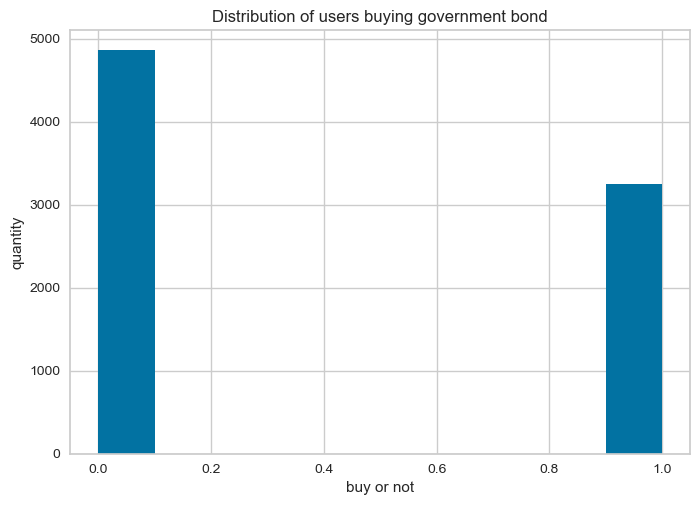

In [91]:
df_bond_sept_users['flag_order_bond'].hist()
plt.title('Distribution of users buying government bond')
plt.xlabel('buy or not')
plt.ylabel('quantity')

#from the graph below, we know that the data is fairly balanced

Text(0, 0.5, 'quantity')

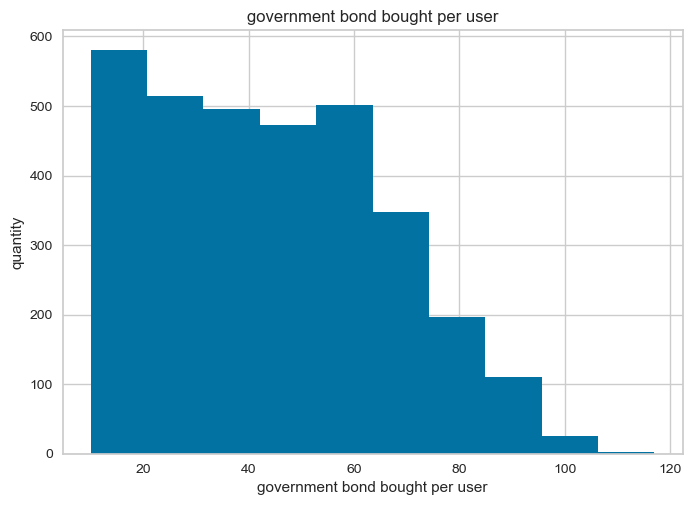

In [95]:
x = df_bond_sept_users['bond_units_ordered'][df_bond_sept_users['flag_order_bond']!=0]

x.hist()
plt.title('government bond bought per user')
plt.xlabel('government bond bought per user')
plt.ylabel('quantity')

#from the graph below, we know that the data is fairly balanced

Text(0, 0.5, 'quantity')

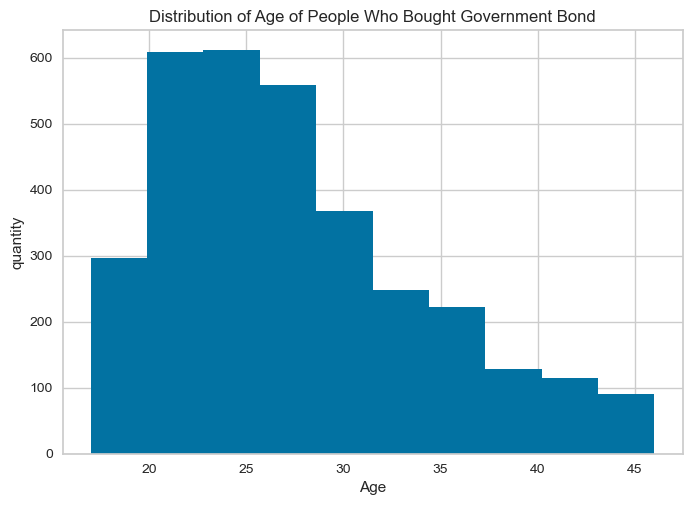

In [98]:
x = df_bond_sept_users['user_age'][df_bond_sept_users['flag_order_bond']!=0]

x.hist()
plt.title('Distribution of Age of People Who Bought Government Bond')
plt.xlabel('Age')
plt.ylabel('quantity')


# Data transformation

for this data transformation we need to split the daily user balance to 2 seperate tables, which are
- end of period september (2021-09-30)
- end of period october (2021-10-29)

## End of period september

In [10]:
#copy daily user balance data
df_endperiod_sept = df_daily.copy()

# only select on end of period (30 sept)
df_endperiod_sept = df_endperiod_sept[df_endperiod_sept['date']=='2021-09-30']
df_endperiod_sept = df_endperiod_sept[['user_id','date',
                                        'Saham_AUM','Saham_invested_amount',
                                        'Pasar_Uang_AUM','Pasar_Uang_invested_amount',
                                        'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount',
                                        'Campuran_AUM','Campuran_invested_amount']]

df_endperiod_sept = df_endperiod_sept.fillna(0)

#create profit percentage column on each index fund
df_endperiod_sept['Saham_profit_percentage'] = ((df_endperiod_sept['Saham_AUM']/df_endperiod_sept['Saham_invested_amount'])-1)*100
df_endperiod_sept['Pasar_Uang_profit_percentage'] = ((df_endperiod_sept['Pasar_Uang_AUM']/df_endperiod_sept['Pasar_Uang_invested_amount'])-1)*100
df_endperiod_sept['Pendapatan_Tetap_profit_percentage'] = ((df_endperiod_sept['Pendapatan_Tetap_AUM']/df_endperiod_sept['Pendapatan_Tetap_invested_amount'])-1)*100
df_endperiod_sept['Campuran_profit_percentage'] = ((df_endperiod_sept['Campuran_AUM']/df_endperiod_sept['Campuran_invested_amount'])-1)*100

df_endperiod_sept = df_endperiod_sept.fillna(0)

#call the desired columns in order
df_endperiod_sept = df_endperiod_sept[['user_id','date',
                                        'Saham_AUM','Saham_invested_amount','Saham_profit_percentage',
                                        'Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_profit_percentage',
                                        'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_profit_percentage',
                                        'Campuran_AUM','Campuran_invested_amount','Campuran_profit_percentage']]

df_endperiod_sept


,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage
58,50701,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9943587.0,10000000.0,-0.56413
102,50961,2021-09-30,2063909.0,2000000.0,3.195450,700603.0,700000.0,0.086143,1398998.0,1400000.0,-0.071571,0.0,0.0,0.00000
172,53759,2021-09-30,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,0.545000,0.0,0.0,0.00000
218,54759,2021-09-30,0.0,0.0,0.000000,12049049.0,12000000.0,0.408742,0.0,0.0,0.000000,0.0,0.0,0.00000
276,61414,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354826,4165020,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000
354885,4165132,2021-09-30,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
355081,4165630,2021-09-30,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,-0.262000,0.0,0.0,0.00000
355121,4165704,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,-0.130000,0.0,0.0,0.00000


## End of period october

In [11]:
#copy daily user balance data
df_endperiod_oct = df_daily.copy()

# only select on end of period (30 sept)
df_endperiod_oct = df_endperiod_oct[df_endperiod_oct['date']=='2021-10-29']
df_endperiod_oct = df_endperiod_oct[['user_id','date',
                                        'Saham_AUM','Saham_invested_amount',
                                        'Pasar_Uang_AUM','Pasar_Uang_invested_amount',
                                        'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount',
                                        'Campuran_AUM','Campuran_invested_amount']]

df_endperiod_oct = df_endperiod_oct.fillna(0)

#create profit percentage column on each index fund
df_endperiod_oct['Saham_profit_percentage'] = ((df_endperiod_oct['Saham_AUM']/df_endperiod_oct['Saham_invested_amount'])-1)*100
df_endperiod_oct['Pasar_Uang_profit_percentage'] = ((df_endperiod_oct['Pasar_Uang_AUM']/df_endperiod_oct['Pasar_Uang_invested_amount'])-1)*100
df_endperiod_oct['Pendapatan_Tetap_profit_percentage'] = ((df_endperiod_oct['Pendapatan_Tetap_AUM']/df_endperiod_oct['Pendapatan_Tetap_invested_amount'])-1)*100
df_endperiod_oct['Campuran_profit_percentage'] = ((df_endperiod_oct['Campuran_AUM']/df_endperiod_oct['Campuran_invested_amount'])-1)*100

df_endperiod_oct = df_endperiod_oct.fillna(0)

#call the desired columns in order
df_endperiod_oct = df_endperiod_oct[['user_id','date',
                                        'Saham_AUM','Saham_invested_amount','Saham_profit_percentage',
                                        'Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_profit_percentage',
                                        'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_profit_percentage',
                                        'Campuran_AUM','Campuran_invested_amount','Campuran_profit_percentage']]

df_endperiod_oct


,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage
17,43195,2021-10-29,280945.0,280000.0,0.337500,50127.0,50000.0,0.254000,170702.0,170000.0,0.412941,0.0,0.0,0.00000
34,47757,2021-10-29,581030.0,600000.0,-3.161667,0.0,0.0,0.000000,9033958.0,9000000.0,0.377311,0.0,0.0,0.00000
79,50701,2021-10-29,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9637035.0,10000000.0,-3.62965
123,50961,2021-10-29,7632462.0,7110318.0,7.343469,703336.0,700000.0,0.476571,1405335.0,1400000.0,0.381071,969171.0,1000000.0,-3.08290
144,51883,2021-10-29,96927.0,90000.0,7.696667,20036.0,20000.0,0.180000,90331.0,90000.0,0.367778,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
401235,4457532,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
401236,4457596,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
401237,4457622,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000


# Data Cleaning

## Drop Irrelevant values

Users data

In [12]:
df_bond_sept_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,vintage_30sept,vintage_29oct,flag_order_bond,bond_units_ordered
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,49,78,0,0
1,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,46,75,0,0
2,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,NaN,Gaji,32,61,0,0
3,3836491,2021-08-18,Male,59,Others,< 10 Juta,used referral,Lainnya,43,72,0,0
4,3783302,2021-09-14,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,16,45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8479,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Lainnya,55,84,0,0
8480,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,52,81,0,0
8481,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,59,88,1,18
8482,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,Gaji,50,79,0,0


^^The only variable thats necesarry to perform the analysis are gender, age, occupation, income^^

In [13]:
#drop registration date
df_bond_sept_users.drop(['registration_import_datetime','user_income_source'], inplace=True, axis=1)
df_bond_sept_users

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage_30sept,vintage_29oct,flag_order_bond,bond_units_ordered
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,49,78,0,0
1,3802293,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,46,75,0,0
2,3049927,Male,53,Swasta,< 10 Juta,NaN,32,61,0,0
3,3836491,Male,59,Others,< 10 Juta,used referral,43,72,0,0
4,3783302,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NaN,16,45,0,0
...,...,...,...,...,...,...,...,...,...,...
8479,3773859,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,55,84,0,0
8480,3798265,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,52,81,0,0
8481,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,59,88,1,18
8482,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,50,79,0,0


## Check for missing data

Users data

In [14]:
df_bond_sept_users.isna().sum()

user_id                  0
user_gender              0
user_age                 0
user_occupation          0
user_income_range        0
referral_code_used    5455
vintage_30sept           0
vintage_29oct            0
flag_order_bond          0
bond_units_ordered       0
dtype: int64

In [15]:
df_bond_sept_users['referral_code_used'].fillna('no',inplace=True)
df_bond_sept_users[['referral_code_used']]

,referral_code_used
0,no
1,used referral
2,no
3,used referral
4,no
...,...
8479,no
8480,used referral
8481,no
8482,no


end of period september

In [16]:
df_endperiod_sept.isna().sum()

user_id                               0
date                                  0
Saham_AUM                             0
Saham_invested_amount                 0
Saham_profit_percentage               0
Pasar_Uang_AUM                        0
Pasar_Uang_invested_amount            0
Pasar_Uang_profit_percentage          0
Pendapatan_Tetap_AUM                  0
Pendapatan_Tetap_invested_amount      0
Pendapatan_Tetap_profit_percentage    0
Campuran_AUM                          0
Campuran_invested_amount              0
Campuran_profit_percentage            0
dtype: int64

end of period october

In [17]:
df_endperiod_oct.isna().sum()

user_id                               0
date                                  0
Saham_AUM                             0
Saham_invested_amount                 0
Saham_profit_percentage               0
Pasar_Uang_AUM                        0
Pasar_Uang_invested_amount            0
Pasar_Uang_profit_percentage          0
Pendapatan_Tetap_AUM                  0
Pendapatan_Tetap_invested_amount      0
Pendapatan_Tetap_profit_percentage    0
Campuran_AUM                          0
Campuran_invested_amount              0
Campuran_profit_percentage            0
dtype: int64

## Checking duplicates

In [18]:
df_bond_sept_users.duplicated().sum()

0

In [19]:
df_endperiod_sept.duplicated().sum()

0

In [20]:
df_endperiod_oct.duplicated().sum()

0

## Handling outliers

users data

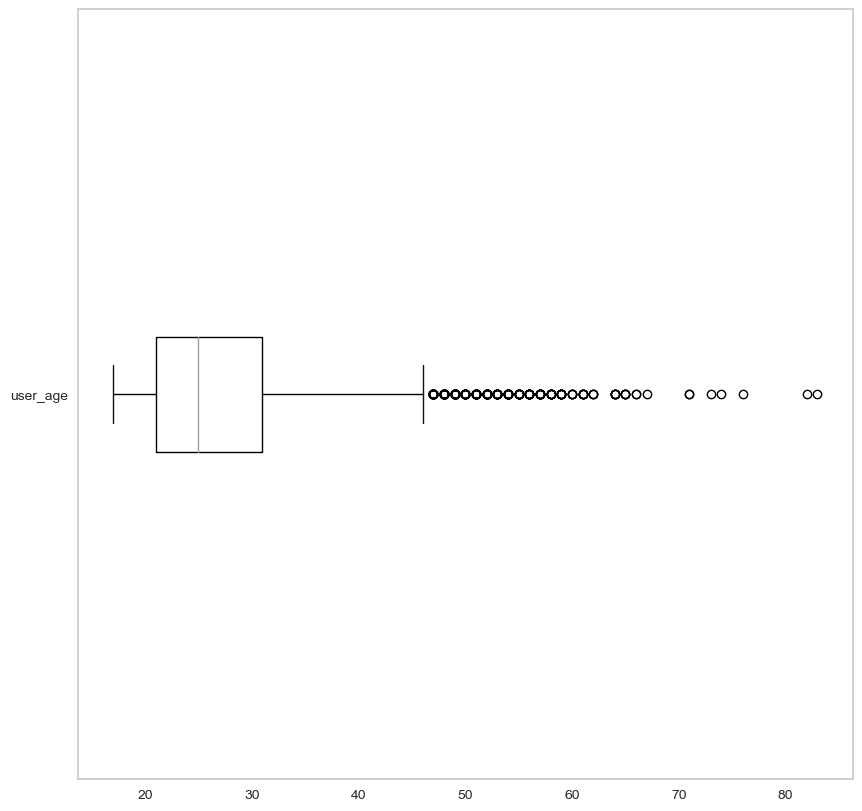

In [21]:
df_bond_sept_users.boxplot(column=['user_age'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

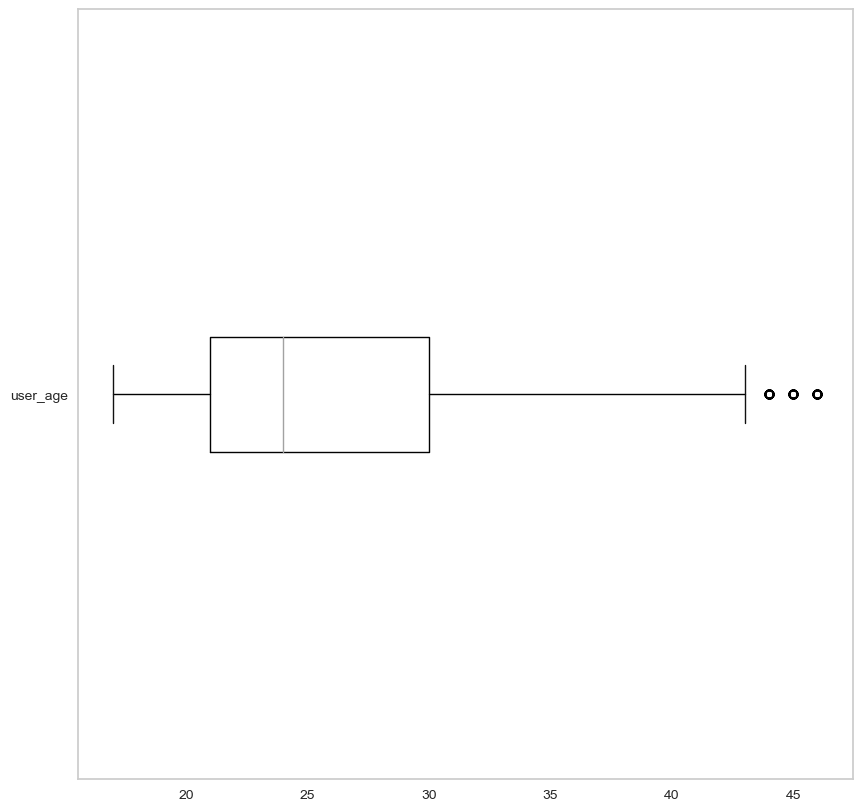

In [22]:
Q1 = df_bond_sept_users['user_age'].quantile(0.25)
Q3 = df_bond_sept_users['user_age'].quantile(0.75)

#Since outliers only present above upper fence, so we only remove data's outlier with upper fence
IQR = Q3-Q1
upper_fence = Q3 + 1.5*IQR

df_bond_sept_users = df_bond_sept_users[~(df_bond_sept_users['user_age']>upper_fence)]

df_bond_sept_users.boxplot(column=['user_age'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

end of period sept

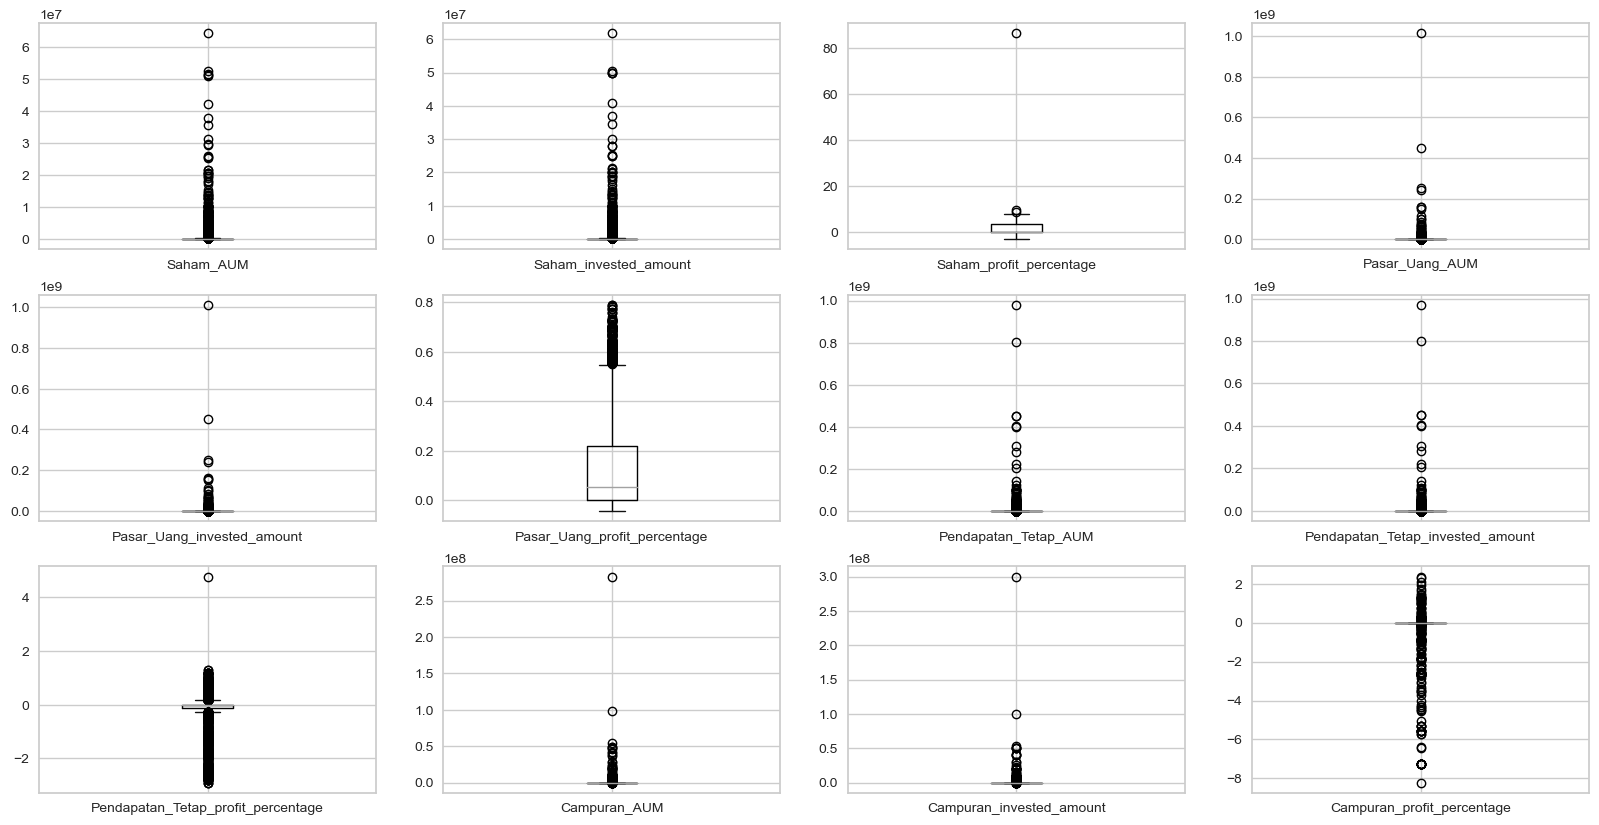

In [23]:
numerical = ['Saham_AUM','Saham_invested_amount','Saham_profit_percentage',
            'Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_profit_percentage',
            'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_profit_percentage',
            'Campuran_AUM','Campuran_invested_amount','Campuran_profit_percentage']

fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical):
    a = df_endperiod_sept.boxplot(el, ax=axes.flatten()[i],grid=True)
plt.show()

before we start to remove outliers using IQR formula. we need to know that the value **0** means no transaction, we need to exclude data with 0 values while calculating by replacing with NaN value

In [24]:
df_endperiod_sept = df_endperiod_sept.replace(0, np.NaN, regex=True)

In [25]:
df_endperiod_sept.shape

(8277, 14)

In [26]:
#remove outliers using 1 percentile up and down
for i in numerical:
    boxplot_min = df_endperiod_sept[i].quantile(0.01)
    boxplot_max = df_endperiod_sept[i].quantile(0.99)

    filter_price_min = df_endperiod_sept[i]<boxplot_min
    filter_price_max = df_endperiod_sept[i]>boxplot_max

    df_endperiod_sept = df_endperiod_sept[~
    (filter_price_min | filter_price_max)
    ]

In [27]:
df_endperiod_sept.shape

(7712, 14)

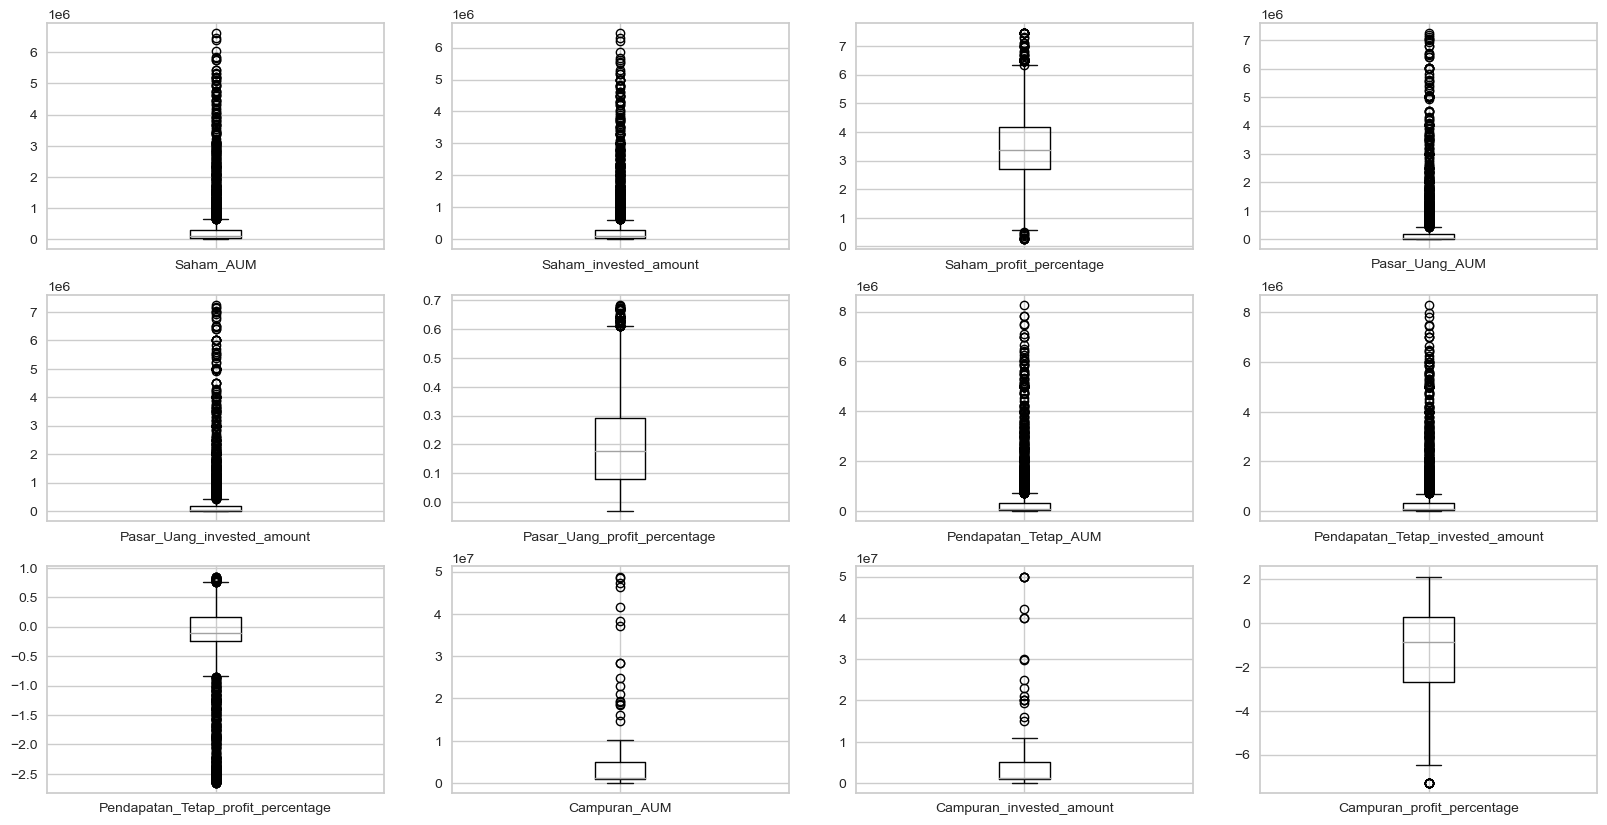

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical):
    a = df_endperiod_sept.boxplot(el, ax=axes.flatten()[i],grid=True)
plt.show()

In [29]:
#don't forget to fill NaN value with 0 again
df_endperiod_sept.fillna(0,inplace=True)

Outliers removed percentage:
(8277-7712)/8277*100 = 6.82%

**6.82% of outliers are removed**

end of period oct

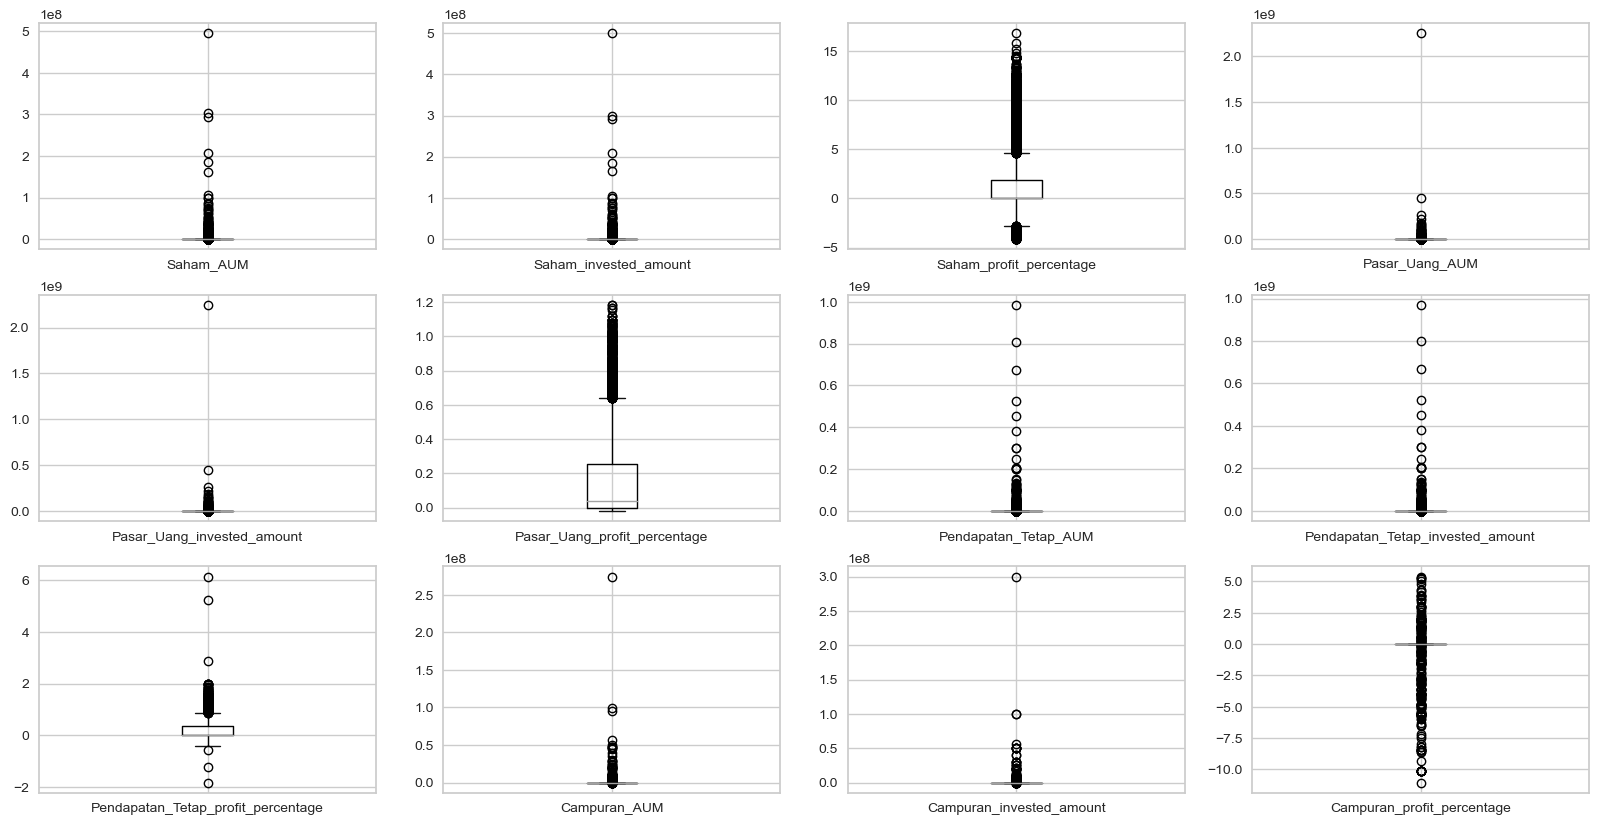

In [30]:
numerical = ['Saham_AUM','Saham_invested_amount','Saham_profit_percentage',
            'Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_profit_percentage',
            'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_profit_percentage',
            'Campuran_AUM','Campuran_invested_amount','Campuran_profit_percentage']

fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical):
    a = df_endperiod_oct.boxplot(el, ax=axes.flatten()[i],grid=True)
plt.show()

In [31]:
df_endperiod_oct = df_endperiod_oct.replace(0, np.NaN, regex=True)

In [32]:
df_endperiod_oct.shape

(14712, 14)

In [33]:
#remove outliers using 1 percentile up and down
for i in numerical:
    boxplot_min = df_endperiod_oct[i].quantile(0.01)
    boxplot_max = df_endperiod_oct[i].quantile(0.99)

    filter_price_min = df_endperiod_oct[i]<boxplot_min
    filter_price_max = df_endperiod_oct[i]>boxplot_max

    df_endperiod_oct = df_endperiod_oct[~
    (filter_price_min | filter_price_max)
    ]

In [34]:
df_endperiod_oct.shape

(13734, 14)

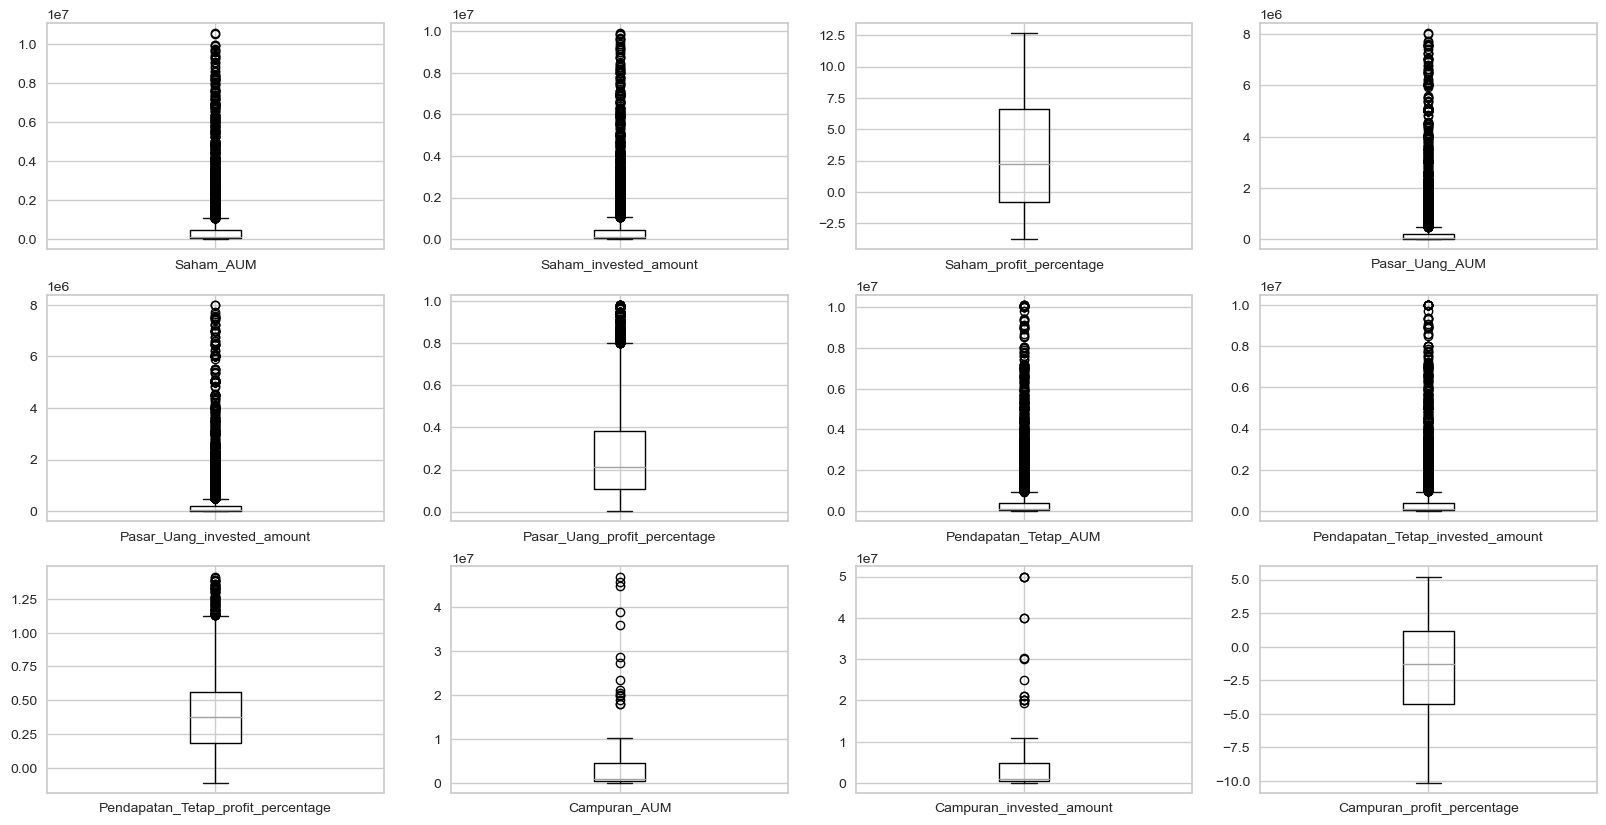

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical):
    a = df_endperiod_oct.boxplot(el, ax=axes.flatten()[i],grid=True)
plt.show()

In [36]:
#don't forget to fill NaN value with 0 again
df_endperiod_oct.fillna(0,inplace=True)

Outliers removed percentage:
(14712-13734)/14712*100 = 6.64%

**6.64% of outliers are removed**

## Check data types

users data

In [37]:
df_users.dtypes

user_id                          int64
registration_import_datetime    object
user_gender                     object
user_age                         int64
user_occupation                 object
user_income_range               object
referral_code_used              object
user_income_source              object
vintage_30sept                   int64
vintage_29oct                    int64
dtype: object

In [38]:
#since user_id is a unique identifier and not just a normal value number, we need to convert it to object
df_users['user_id'] = df_users['user_id'].astype(str)

/var/folders/l9/74jysvns7sn8wk39d1sgfb940000gn/T/ipykernel_14038/1411277713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['user_id'] = df_users['user_id'].astype(str)


In [39]:
df_bond_sept_users.dtypes

user_id                int64
user_gender           object
user_age               int64
user_occupation       object
user_income_range     object
referral_code_used    object
vintage_30sept         int64
vintage_29oct          int64
flag_order_bond        int64
bond_units_ordered     int64
dtype: object

end of period sept

In [40]:
#since user_id is a unique identifier and not just a normal value number, we need to convert it to object
df_bond_sept_users['user_id'] = df_bond_sept_users['user_id'].astype(str)
df_bond_sept['user_id'] = df_bond_sept['user_id'].astype(str)

/var/folders/l9/74jysvns7sn8wk39d1sgfb940000gn/T/ipykernel_14038/1415992805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bond_sept_users['user_id'] = df_bond_sept_users['user_id'].astype(str)


In [41]:
df_endperiod_sept.dtypes

user_id                                 int64
date                                   object
Saham_AUM                             float64
Saham_invested_amount                 float64
Saham_profit_percentage               float64
Pasar_Uang_AUM                        float64
Pasar_Uang_invested_amount            float64
Pasar_Uang_profit_percentage          float64
Pendapatan_Tetap_AUM                  float64
Pendapatan_Tetap_invested_amount      float64
Pendapatan_Tetap_profit_percentage    float64
Campuran_AUM                          float64
Campuran_invested_amount              float64
Campuran_profit_percentage            float64
dtype: object

In [42]:
#since user_id is a unique identifier and not just a normal value number, we need to convert it to object
df_endperiod_sept['user_id'] = df_endperiod_sept['user_id'].astype(str)

end of period oct

In [43]:
df_endperiod_oct.dtypes

user_id                                 int64
date                                   object
Saham_AUM                             float64
Saham_invested_amount                 float64
Saham_profit_percentage               float64
Pasar_Uang_AUM                        float64
Pasar_Uang_invested_amount            float64
Pasar_Uang_profit_percentage          float64
Pendapatan_Tetap_AUM                  float64
Pendapatan_Tetap_invested_amount      float64
Pendapatan_Tetap_profit_percentage    float64
Campuran_AUM                          float64
Campuran_invested_amount              float64
Campuran_profit_percentage            float64
dtype: object

In [44]:
#since user_id is a unique identifier and not just a normal value number, we need to convert it to object
df_endperiod_oct['user_id'] = df_endperiod_oct['user_id'].astype(str)

## simplify categorical data by dissolving variable with small quantity to other variables

In [45]:
#simplify categorical value like we did ont the Milestone 2

df_bond_sept_users.loc[df_bond_sept_users['user_occupation'] == 'PNS', 'user_occupation'] = 'Others'
df_bond_sept_users.loc[df_bond_sept_users['user_occupation'] == 'Guru', 'user_occupation'] = 'Others'
df_bond_sept_users.loc[df_bond_sept_users['user_occupation'] == 'TNI/Polisi', 'user_occupation'] = 'Others'
df_bond_sept_users.loc[df_bond_sept_users['user_occupation'] == 'Pensiunan', 'user_occupation'] = 'Others'

df_bond_sept_users.loc[df_bond_sept_users['user_income_range'] == '> Rp 100 Juta - 500 Juta', 'user_income_range'] = '> Rp 100 Juta'
df_bond_sept_users.loc[df_bond_sept_users['user_income_range'] == '> Rp 500 Juta - 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'
df_bond_sept_users.loc[df_bond_sept_users['user_income_range'] == '> Rp 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'

df_bond_sept_users

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage_30sept,vintage_29oct,flag_order_bond,bond_units_ordered
279,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,no,27,56,0,0
280,2182692,Male,17,Pelajar,< 10 Juta,used referral,23,52,1,95
281,3426536,Female,17,Pelajar,< 10 Juta,no,9,38,0,0
282,336770,Male,17,Pelajar,Rp 10 Juta - 50 Juta,no,11,40,1,17
283,3750521,Male,17,Pelajar,< 10 Juta,no,8,37,1,43
...,...,...,...,...,...,...,...,...,...,...
8381,3791358,Female,46,IRT,> Rp 100 Juta,no,53,82,1,21
8382,3662093,Male,46,Pengusaha,> Rp 100 Juta,no,37,66,1,100
8383,3736233,Male,46,Swasta,< 10 Juta,no,59,88,0,0
8384,2478889,Female,46,Swasta,< 10 Juta,no,49,78,1,17


## String manipulation

users data

In [46]:
#referal code used needs to be manipulated to 'no' and 'yes'
df_bond_sept_users['referral_code_used'] = df_bond_sept_users['referral_code_used'].replace('used referral','yes')

df_bond_sept_users['referral_code_used'].value_counts()

/var/folders/l9/74jysvns7sn8wk39d1sgfb940000gn/T/ipykernel_14038/1765362744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bond_sept_users['referral_code_used'] = df_bond_sept_users['referral_code_used'].replace('used referral','yes')


no     5223
yes    2884
Name: referral_code_used, dtype: int64

# Prepare data to fit to the logistic regression model

## merge end of period september data 

In [47]:
df_clean_sept = df_endperiod_sept.copy()
df_clean_sept = df_clean_sept.merge(df_bond_sept_users, how='inner',left_on='user_id', right_on='user_id')
df_clean_sept

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_profit_percentage,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage_30sept,vintage_29oct,flag_order_bond,bond_units_ordered
0,50701,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,-0.56413,Female,28,IRT,Rp 10 Juta - 50 Juta,no,37,66,1,34
1,50961,2021-09-30,2063909.0,2000000.0,3.195450,700603.0,700000.0,0.086143,1398998.0,1400000.0,...,0.00000,Female,33,Swasta,> Rp 100 Juta,no,41,70,1,99
2,53759,2021-09-30,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,...,0.00000,Male,29,Swasta,< 10 Juta,no,42,71,0,0
3,61414,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,Male,26,Pelajar,< 10 Juta,no,53,82,0,0
4,66145,2021-09-30,249327.0,240000.0,3.886250,29992.0,30000.0,-0.026667,129748.0,130000.0,...,0.00000,Female,33,Swasta,> Rp 100 Juta,no,28,57,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,4165020,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,Male,24,Others,< 10 Juta,yes,2,31,0,0
7397,4165132,2021-09-30,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,...,0.00000,Male,18,Pelajar,< 10 Juta,yes,2,31,0,0
7398,4165630,2021-09-30,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,...,0.00000,Female,28,Swasta,Rp 10 Juta - 50 Juta,no,2,31,1,55
7399,4165704,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,...,0.00000,Male,25,Swasta,Rp 10 Juta - 50 Juta,yes,2,31,0,0


In [48]:
df_clean_sept.columns

Index(['user_id', 'date', 'Saham_AUM', 'Saham_invested_amount',
       'Saham_profit_percentage', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pasar_Uang_profit_percentage',
       'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_profit_percentage', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_profit_percentage', 'user_gender',
       'user_age', 'user_occupation', 'user_income_range',
       'referral_code_used', 'vintage_30sept', 'vintage_29oct',
       'flag_order_bond', 'bond_units_ordered'],
      dtype='object')

In [49]:
#deleting columns thats not gonna be used (user id, date, vintage_29oct)
df_data_used = df_clean_sept.drop(['user_id','date','vintage_29oct'],axis=1)

#replacing columns name from 'vintage_30sept' to 'vintage' only
df_data_used.rename(columns={'vintage_30sept': 'vintage'}, inplace=True)
df_data_used.columns

Index(['Saham_AUM', 'Saham_invested_amount', 'Saham_profit_percentage',
       'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount',
       'Pasar_Uang_profit_percentage', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_profit_percentage', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_profit_percentage', 'user_gender',
       'user_age', 'user_occupation', 'user_income_range',
       'referral_code_used', 'vintage', 'flag_order_bond',
       'bond_units_ordered'],
      dtype='object')

## Select the data thats gonna be used to train

keep in mind that the data selected must be available in the oct dataset aswell

In [50]:
numerical = ['Saham_AUM', 'Saham_invested_amount', 'Saham_profit_percentage',
       'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount',
       'Pasar_Uang_profit_percentage', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_profit_percentage', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_profit_percentage','flag_order_bond'
       ,'vintage','user_age']

categorical = ['user_gender', 'user_occupation', 'user_income_range',
       'referral_code_used']

all_columns = numerical + categorical

df_data_used = df_data_used[all_columns]
df_data_used

,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage,flag_order_bond,vintage,user_age,user_gender,user_occupation,user_income_range,referral_code_used
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9943587.0,10000000.0,-0.56413,1,37,28,Female,IRT,Rp 10 Juta - 50 Juta,no
1,2063909.0,2000000.0,3.195450,700603.0,700000.0,0.086143,1398998.0,1400000.0,-0.071571,0.0,0.0,0.00000,1,41,33,Female,Swasta,> Rp 100 Juta,no
2,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,0.545000,0.0,0.0,0.00000,0,42,29,Male,Swasta,< 10 Juta,no
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0,53,26,Male,Pelajar,< 10 Juta,no
4,249327.0,240000.0,3.886250,29992.0,30000.0,-0.026667,129748.0,130000.0,-0.193846,0.0,0.0,0.00000,0,28,33,Female,Swasta,> Rp 100 Juta,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0,2,24,Male,Others,< 10 Juta,yes
7397,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000,0,2,18,Male,Pelajar,< 10 Juta,yes
7398,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,-0.262000,0.0,0.0,0.00000,1,2,28,Female,Swasta,Rp 10 Juta - 50 Juta,no
7399,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,-0.130000,0.0,0.0,0.00000,0,2,25,Male,Swasta,Rp 10 Juta - 50 Juta,yes


## Define numerical and categorical column and give the right treatment

In [52]:
df_cluster = df_data_used.copy()

#Normalize numerical data using minmax scaler
scaler = MinMaxScaler()
df_cluster[numerical] = scaler.fit_transform(df_cluster[numerical])

#create dummy for categorical data
df_cluster = pd.get_dummies(df_cluster, columns=categorical)

df_cluster

,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,...,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,user_income_range_< 10 Juta,user_income_range_> Rp 100 Juta,user_income_range_> Rp 50 Juta - 100 Juta,user_income_range_Rp 10 Juta - 50 Juta,referral_code_used_no,referral_code_used_yes
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.203733,...,0,0,0,0,0,0,0,1,1,0
1,0.320301,0.317460,0.429035,0.096707,0.096685,0.162779,0.169199,0.168675,0.736995,0.000000,...,0,0,0,1,0,1,0,0,1,0
2,0.011357,0.011111,0.609751,0.001384,0.001381,0.420463,0.002432,0.002410,0.913435,0.000000,...,0,0,0,1,1,0,0,0,1,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.000000,...,0,1,0,0,1,0,0,0,1,0
4,0.038693,0.038095,0.521784,0.004140,0.004144,0.004672,0.015692,0.015663,0.702004,0.000000,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.000000,...,1,0,0,0,1,0,0,0,0,1
7397,0.000000,0.000000,0.000000,0.001380,0.001381,0.056062,0.000000,0.000000,0.757476,0.000000,...,0,1,0,0,1,0,0,0,0,1
7398,0.006460,0.006349,0.545448,0.001380,0.001381,0.056062,0.006031,0.006024,0.682501,0.000000,...,0,0,0,1,0,0,0,1,1,0
7399,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.001208,0.001205,0.720275,0.000000,...,0,0,0,1,0,0,0,1,0,1


/var/folders/l9/74jysvns7sn8wk39d1sgfb940000gn/T/ipykernel_14038/1304375134.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cluster.corr(), dtype=np.bool))


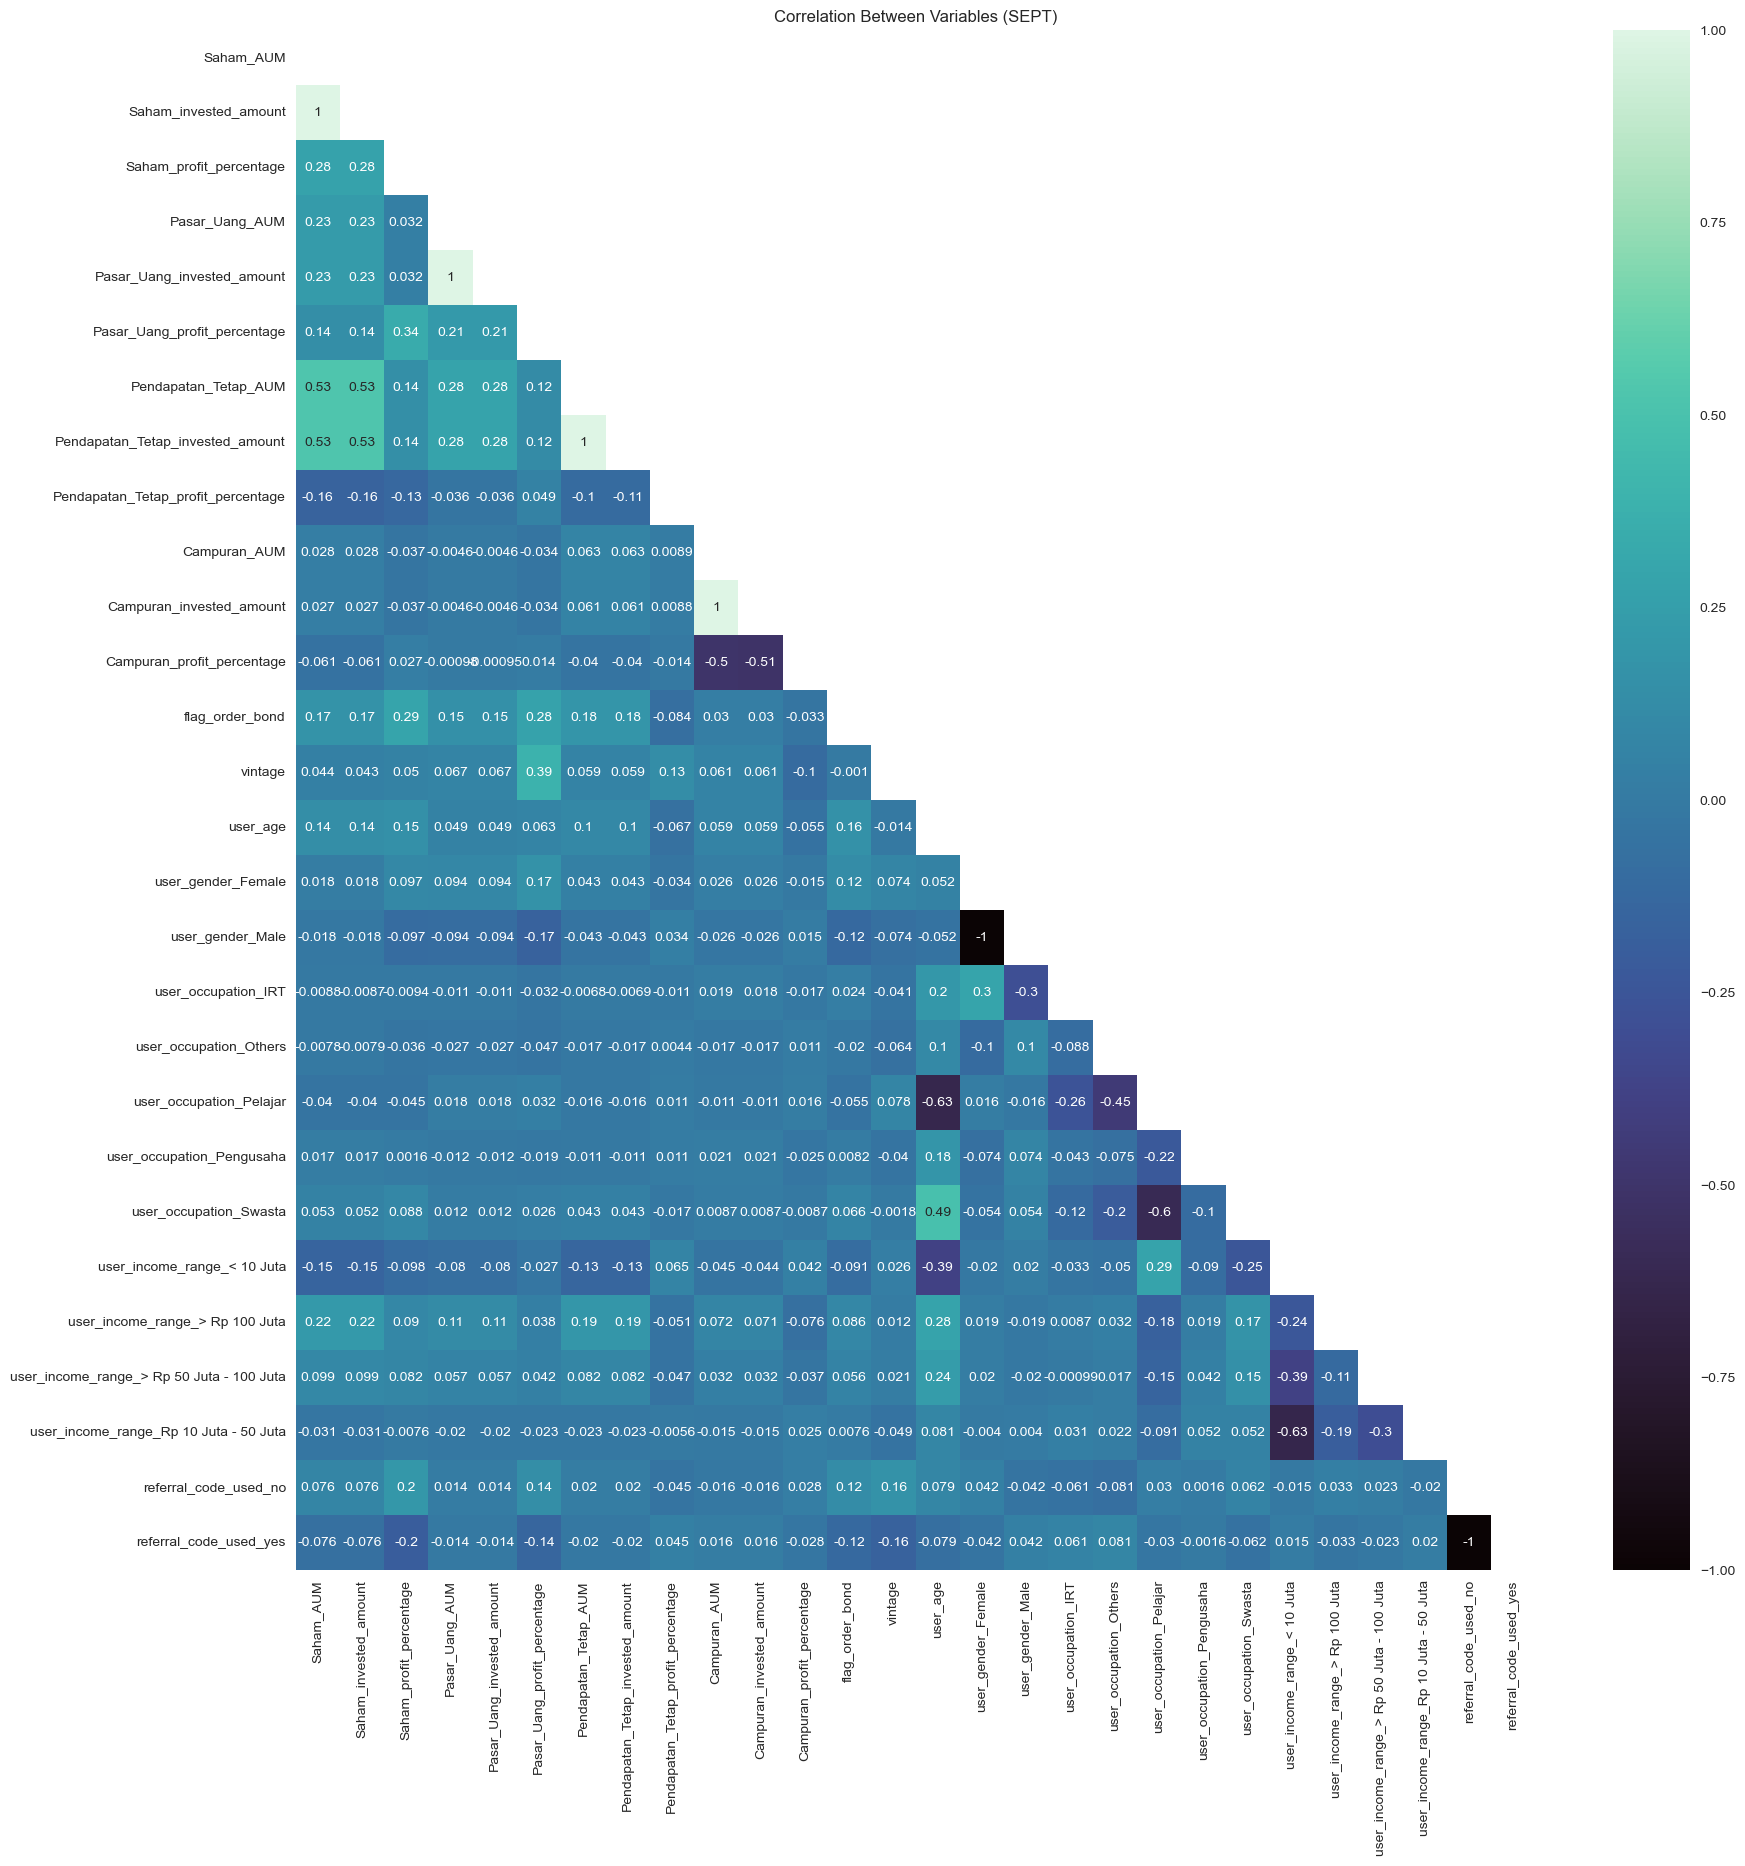

In [53]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variables (SEPT)')

mask = np.triu(np.ones_like(
    df_cluster.corr(), dtype=np.bool))
sns.heatmap(df_cluster.corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

At this point, we need to choose which variables we want to include to our model.

The rule is: choose variables that are low-correlated to other variables

This means choose the threshold (e.g. if correlation < 0.7) and remove any variables that has any correlation greater than 0.7

In [54]:
# Create correlation matrix
corr_matrix = df_cluster.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

/var/folders/l9/74jysvns7sn8wk39d1sgfb940000gn/T/ipykernel_14038/759309281.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['Saham_invested_amount',
 'Pasar_Uang_invested_amount',
 'Pendapatan_Tetap_invested_amount',
 'Campuran_invested_amount',
 'user_gender_Male',
 'referral_code_used_yes']

In [55]:
to_keep = list(set(df_cluster.columns) - set(to_drop))
to_keep

['Saham_AUM',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_occupation_Pelajar',
 'Pasar_Uang_AUM',
 'user_gender_Female',
 'vintage',
 'user_income_range_> Rp 100 Juta',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'user_age',
 'user_occupation_Swasta',
 'Saham_profit_percentage',
 'Pendapatan_Tetap_profit_percentage',
 'user_income_range_< 10 Juta',
 'user_occupation_IRT',
 'Pendapatan_Tetap_AUM',
 'referral_code_used_no',
 'user_occupation_Pengusaha',
 'Pasar_Uang_profit_percentage',
 'flag_order_bond',
 'Campuran_profit_percentage',
 'user_occupation_Others',
 'Campuran_AUM']

/var/folders/l9/74jysvns7sn8wk39d1sgfb940000gn/T/ipykernel_14038/1994377516.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cluster[to_keep].corr(), dtype=np.bool))


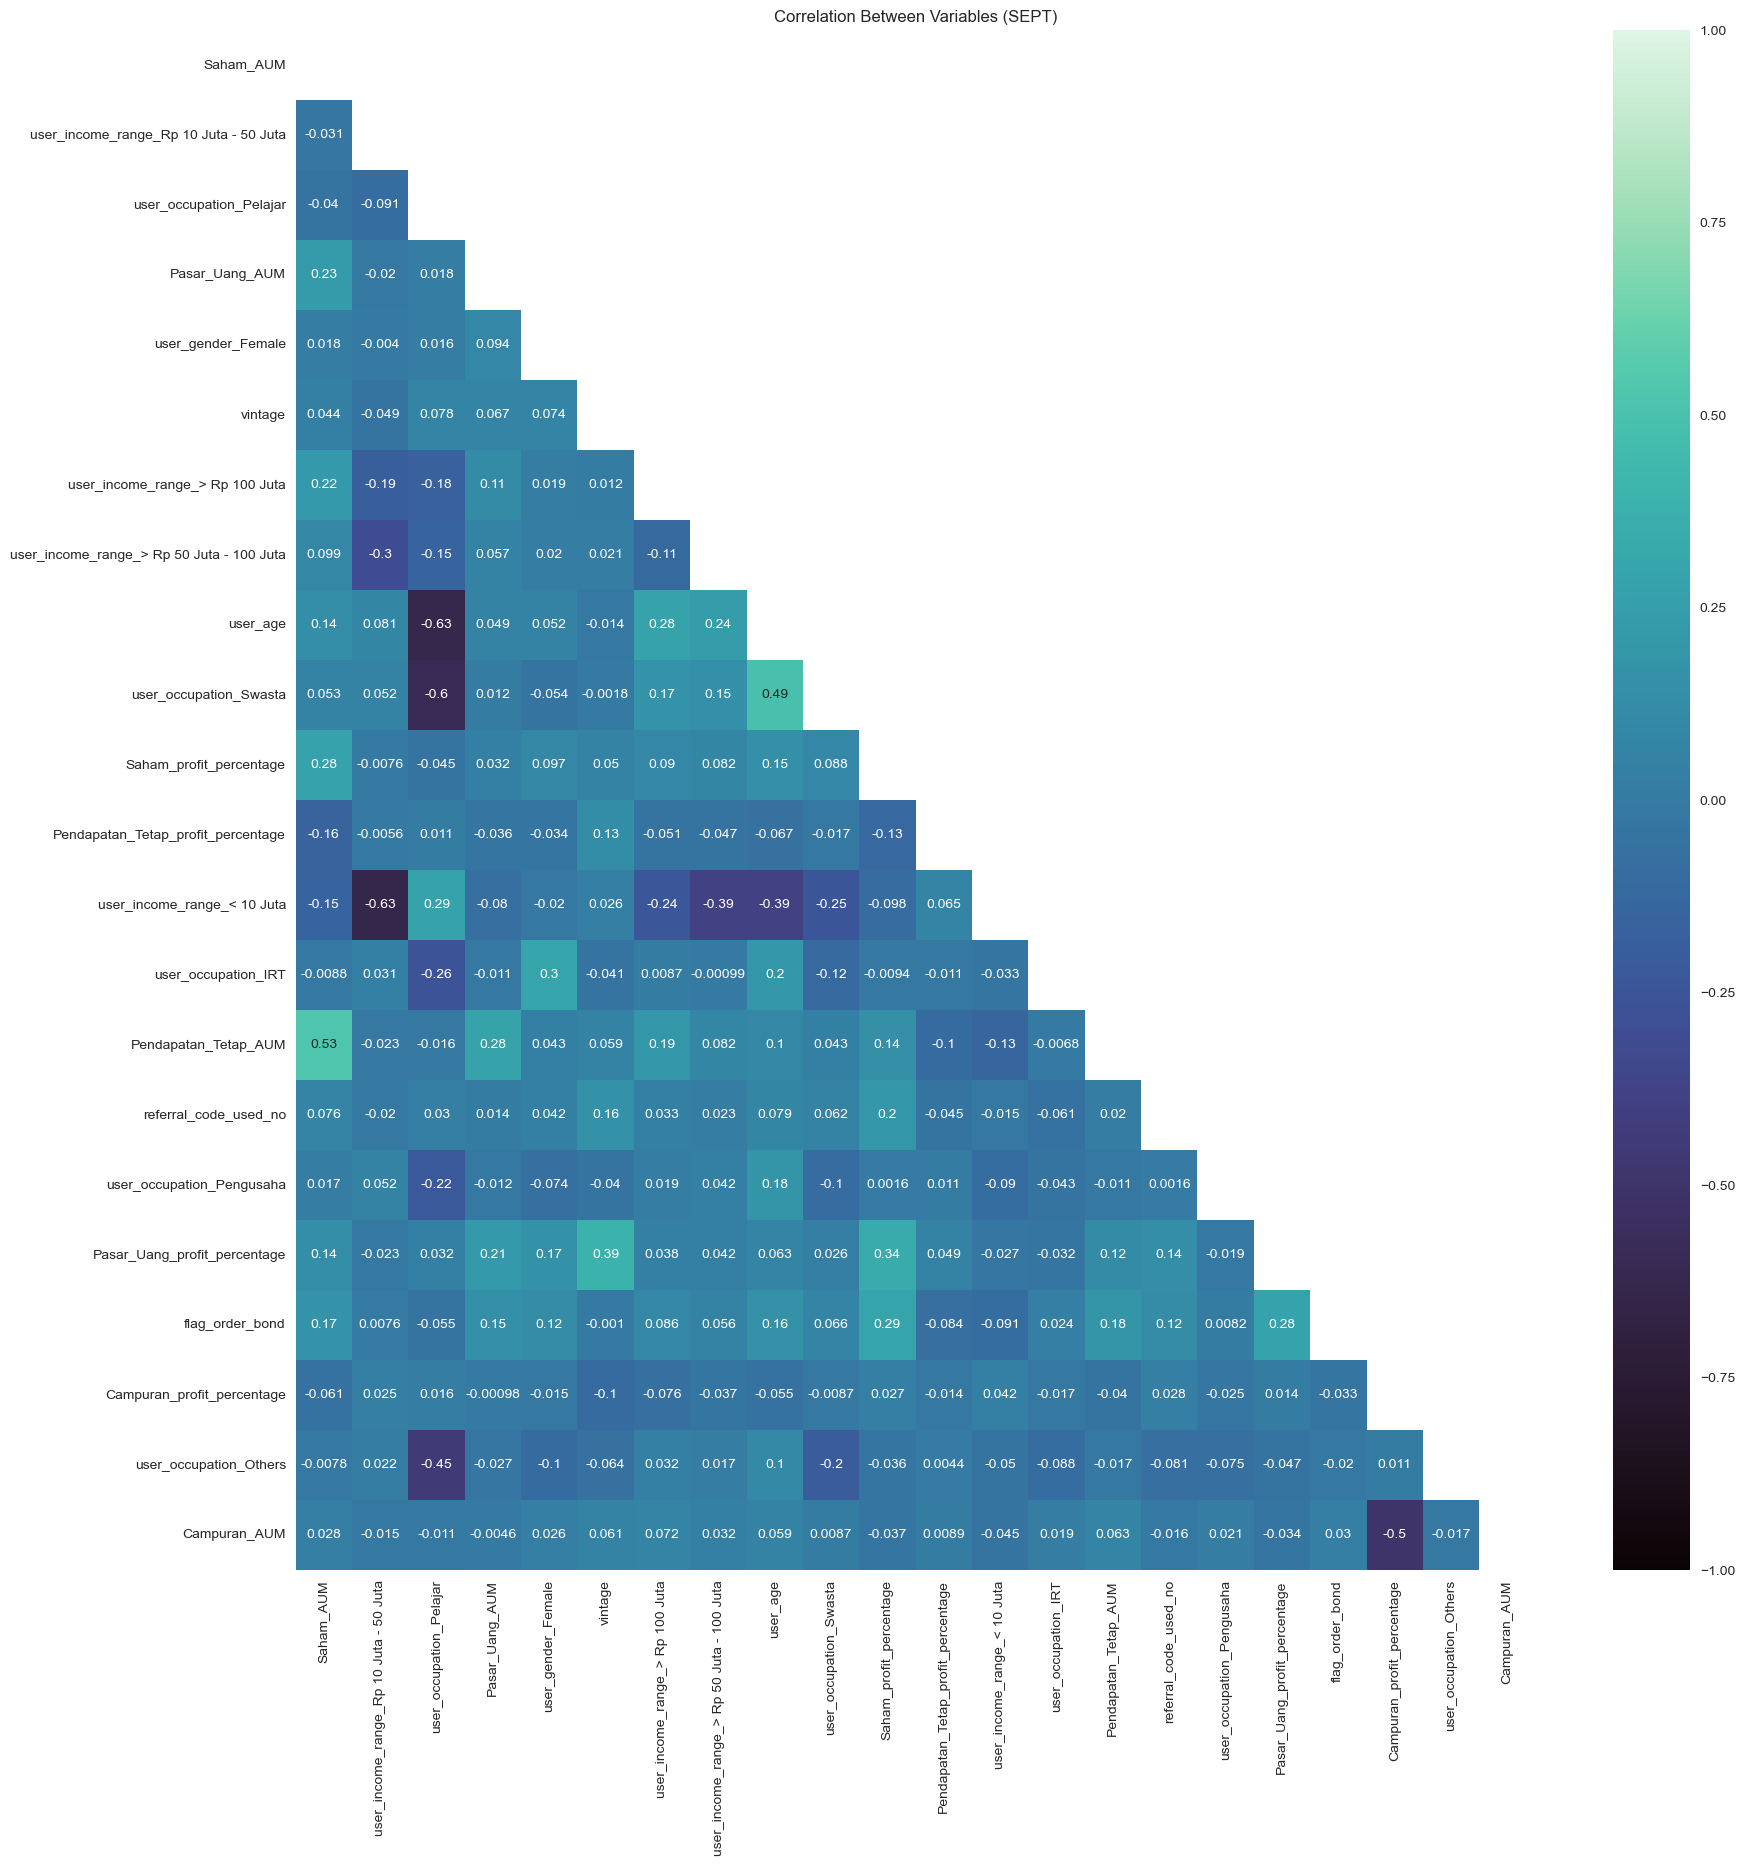

In [56]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variables (SEPT)')

mask = np.triu(np.ones_like(
    df_cluster[to_keep].corr(), dtype=np.bool))
sns.heatmap(df_cluster[to_keep].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

In [57]:
df_cluster['flag_order_bond'] = df_cluster['flag_order_bond'].astype('int')

# Logistic Regression

The standard machine learning method:
- Split data between _training_ and _test_ part (usually 80% training, 20% test)
- Create model in _training_ data
- Validate the model performance on _test_ data

In [58]:
# Separate Churn from other variables
to_keep_vars = list(set(to_keep) - set(['flag_order_bond']))
to_keep_vars

['Saham_AUM',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_occupation_Pelajar',
 'Pasar_Uang_AUM',
 'user_gender_Female',
 'vintage',
 'user_income_range_> Rp 100 Juta',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'user_age',
 'user_occupation_Swasta',
 'Saham_profit_percentage',
 'Pendapatan_Tetap_profit_percentage',
 'user_income_range_< 10 Juta',
 'user_occupation_IRT',
 'Pendapatan_Tetap_AUM',
 'referral_code_used_no',
 'user_occupation_Pengusaha',
 'Pasar_Uang_profit_percentage',
 'Campuran_profit_percentage',
 'user_occupation_Others',
 'Campuran_AUM']

In [59]:
from sklearn.model_selection import train_test_split

# Define the whole data
x = df_cluster[to_keep_vars]
y = df_cluster[['flag_order_bond']]

# Split into training and test dataset with 80/20 percent ratio
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [60]:
# Check split result
for df in [x_training, x_test, y_training, y_test]:
  print(df.shape)

(5920, 21)
(1481, 21)
(5920, 1)
(1481, 1)


In [61]:
# Check class balance in each datasets
for df in [y_training,y_test]:
  df2 = df.value_counts()
  print(df2)

flag_order_bond
0                  3600
1                  2320
dtype: int64
flag_order_bond
0                  888
1                  593
dtype: int64


In [62]:
# Fit logistic regression model to the training data
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x_training, y_training)

/Users/billy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500)

In [63]:
# Accuracy dr prediksi model dengan data training
model.score(x_training, y_training)

0.6716216216216216

# Confusion Matrix

In [64]:
# confusion_matrix(churn actual, churn prediksi)
confusion_matrix(y_training, model.predict(x_training))

array([[2374, 1226],
       [ 718, 1602]])

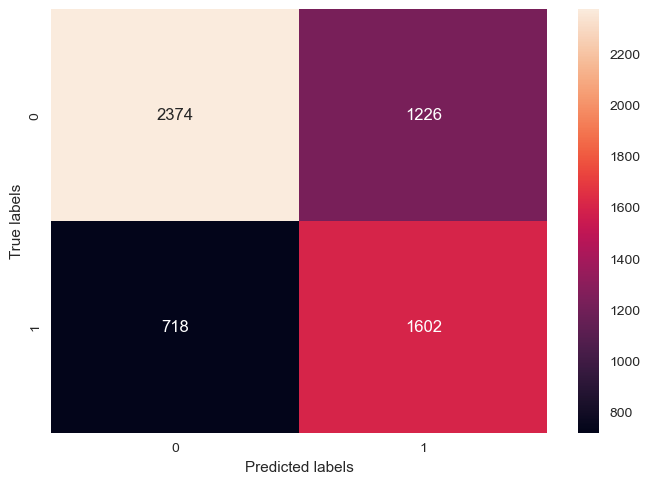

In [65]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(x_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_training, model.predict(x_training), target_names=['Not Churn','Churn']))

              precision    recall  f1-score   support

   Not Churn       0.77      0.66      0.71      3600
       Churn       0.57      0.69      0.62      2320

    accuracy                           0.67      5920
   macro avg       0.67      0.67      0.67      5920
weighted avg       0.69      0.67      0.68      5920



## Check model on the test data

In [67]:
model.score(x_test, y_test)

0.6961512491559757

In [68]:
confusion_matrix(y_test, model.predict(x_test))

array([[605, 283],
       [167, 426]])

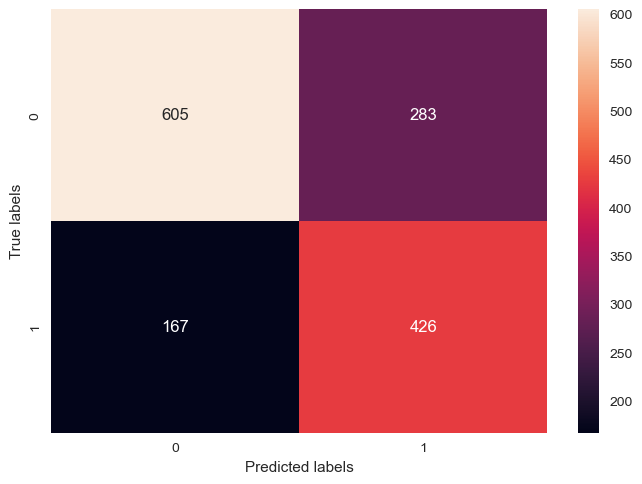

In [69]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

# Benefit-cost analysis

Suppose we want to get a campaign to top 30% of users with highest probability to buy govt bond, with goal to save marketing money to selected customers only 

We can first predict probability for all users, and get the top 30% users:

In [70]:
df_clean_oct = df_endperiod_sept.copy()
df_clean_oct = df_clean_oct.merge(df_bond_sept_users, how='inner',left_on='user_id', right_on='user_id')
df_clean_oct

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_profit_percentage,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage_30sept,vintage_29oct,flag_order_bond,bond_units_ordered
0,50701,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,-0.56413,Female,28,IRT,Rp 10 Juta - 50 Juta,no,37,66,1,34
1,50961,2021-09-30,2063909.0,2000000.0,3.195450,700603.0,700000.0,0.086143,1398998.0,1400000.0,...,0.00000,Female,33,Swasta,> Rp 100 Juta,no,41,70,1,99
2,53759,2021-09-30,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,...,0.00000,Male,29,Swasta,< 10 Juta,no,42,71,0,0
3,61414,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,Male,26,Pelajar,< 10 Juta,no,53,82,0,0
4,66145,2021-09-30,249327.0,240000.0,3.886250,29992.0,30000.0,-0.026667,129748.0,130000.0,...,0.00000,Female,33,Swasta,> Rp 100 Juta,no,28,57,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,4165020,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,Male,24,Others,< 10 Juta,yes,2,31,0,0
7397,4165132,2021-09-30,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,...,0.00000,Male,18,Pelajar,< 10 Juta,yes,2,31,0,0
7398,4165630,2021-09-30,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,...,0.00000,Female,28,Swasta,Rp 10 Juta - 50 Juta,no,2,31,1,55
7399,4165704,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,...,0.00000,Male,25,Swasta,Rp 10 Juta - 50 Juta,yes,2,31,0,0


In [71]:
#deleting columns thats not gonna be used (user id, date, vintage_30sept)
df_data_used = df_clean_oct.drop(['user_id','date','vintage_30sept'],axis=1)

#replacing columns name from 'vintage_30sept' to 'vintage' only
df_data_used.rename(columns={'vintage_29oct': 'vintage'}, inplace=True)
df_data_used.columns

Index(['Saham_AUM', 'Saham_invested_amount', 'Saham_profit_percentage',
       'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount',
       'Pasar_Uang_profit_percentage', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_profit_percentage', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_profit_percentage', 'user_gender',
       'user_age', 'user_occupation', 'user_income_range',
       'referral_code_used', 'vintage', 'flag_order_bond',
       'bond_units_ordered'],
      dtype='object')

Selecting the data

In [72]:
numerical = ['Saham_AUM', 'Saham_invested_amount', 'Saham_profit_percentage',
       'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount',
       'Pasar_Uang_profit_percentage', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_profit_percentage', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_profit_percentage'
       ,'vintage','user_age']

categorical = ['user_gender', 'user_occupation', 'user_income_range',
       'referral_code_used']

all_columns = numerical + categorical

df_data_used = df_data_used[all_columns]
df_data_used

,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage,vintage,user_age,user_gender,user_occupation,user_income_range,referral_code_used
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9943587.0,10000000.0,-0.56413,66,28,Female,IRT,Rp 10 Juta - 50 Juta,no
1,2063909.0,2000000.0,3.195450,700603.0,700000.0,0.086143,1398998.0,1400000.0,-0.071571,0.0,0.0,0.00000,70,33,Female,Swasta,> Rp 100 Juta,no
2,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,0.545000,0.0,0.0,0.00000,71,29,Male,Swasta,< 10 Juta,no
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,82,26,Male,Pelajar,< 10 Juta,no
4,249327.0,240000.0,3.886250,29992.0,30000.0,-0.026667,129748.0,130000.0,-0.193846,0.0,0.0,0.00000,57,33,Female,Swasta,> Rp 100 Juta,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,31,24,Male,Others,< 10 Juta,yes
7397,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000,31,18,Male,Pelajar,< 10 Juta,yes
7398,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,-0.262000,0.0,0.0,0.00000,31,28,Female,Swasta,Rp 10 Juta - 50 Juta,no
7399,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,-0.130000,0.0,0.0,0.00000,31,25,Male,Swasta,Rp 10 Juta - 50 Juta,yes


In [75]:
#Normalize numerical data using minmax scaler
scaler = MinMaxScaler()
df_data_used[numerical] = scaler.fit_transform(df_data_used[numerical])

#create dummy for categorical data
df_data_used = pd.get_dummies(df_data_used, columns=categorical)

df_data_used

,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,...,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,user_income_range_< 10 Juta,user_income_range_> Rp 100 Juta,user_income_range_> Rp 50 Juta - 100 Juta,user_income_range_Rp 10 Juta - 50 Juta,referral_code_used_no,referral_code_used_yes
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.203733,...,0,0,0,0,0,0,0,1,1,0
1,0.320301,0.317460,0.429035,0.096707,0.096685,0.162779,0.169199,0.168675,0.736995,0.000000,...,0,0,0,1,0,1,0,0,1,0
2,0.011357,0.011111,0.609751,0.001384,0.001381,0.420463,0.002432,0.002410,0.913435,0.000000,...,0,0,0,1,1,0,0,0,1,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.000000,...,0,1,0,0,1,0,0,0,1,0
4,0.038693,0.038095,0.521784,0.004140,0.004144,0.004672,0.015692,0.015663,0.702004,0.000000,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.000000,...,1,0,0,0,1,0,0,0,0,1
7397,0.000000,0.000000,0.000000,0.001380,0.001381,0.056062,0.000000,0.000000,0.757476,0.000000,...,0,1,0,0,1,0,0,0,0,1
7398,0.006460,0.006349,0.545448,0.001380,0.001381,0.056062,0.006031,0.006024,0.682501,0.000000,...,0,0,0,1,0,0,0,1,1,0
7399,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.001208,0.001205,0.720275,0.000000,...,0,0,0,1,0,0,0,1,0,1


In [76]:
#this is the data form OCT that needs to be predicted
x2 = df_data_used[to_keep_vars]
x2

,Saham_AUM,user_income_range_Rp 10 Juta - 50 Juta,user_occupation_Pelajar,Pasar_Uang_AUM,user_gender_Female,vintage,user_income_range_> Rp 100 Juta,user_income_range_> Rp 50 Juta - 100 Juta,user_age,user_occupation_Swasta,...,Pendapatan_Tetap_profit_percentage,user_income_range_< 10 Juta,user_occupation_IRT,Pendapatan_Tetap_AUM,referral_code_used_no,user_occupation_Pengusaha,Pasar_Uang_profit_percentage,Campuran_profit_percentage,user_occupation_Others,Campuran_AUM
0,0.000000,1,0,0.000000,1,0.603448,0,0,0.379310,0,...,0.757476,0,1,0.000000,1,0,0.042046,0.715981,0,0.203733
1,0.320301,0,0,0.096707,1,0.672414,1,0,0.551724,1,...,0.736995,0,0,0.169199,1,0,0.162779,0.776226,0,0.000000
2,0.011357,0,0,0.001384,0,0.689655,0,0,0.413793,1,...,0.913435,1,0,0.002432,1,0,0.420463,0.776226,0,0.000000
3,0.000000,0,1,0.000000,0,0.879310,0,0,0.310345,0,...,0.757476,1,0,0.000000,1,0,0.042046,0.776226,0,0.000000
4,0.038693,0,0,0.004140,1,0.448276,1,0,0.551724,1,...,0.702004,0,0,0.015692,1,0,0.004672,0.776226,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,0.000000,0,0,0.000000,0,0.000000,0,0,0.241379,0,...,0.757476,1,0,0.000000,0,0,0.042046,0.776226,1,0.000000
7397,0.000000,0,1,0.001380,0,0.000000,0,0,0.034483,0,...,0.757476,1,0,0.000000,0,0,0.056062,0.776226,0,0.000000
7398,0.006460,1,0,0.001380,1,0.000000,0,0,0.379310,1,...,0.682501,0,0,0.006031,1,0,0.056062,0.776226,0,0.000000
7399,0.000000,1,0,0.000000,0,0.000000,0,0,0.275862,1,...,0.720275,0,0,0.001208,0,0,0.042046,0.776226,0,0.000000


In [77]:
#this is the data from SEPT govt bond order
y

,flag_order_bond
0,1
1,1
2,0
3,0
4,0
...,...
7396,0
7397,0
7398,1
7399,0


In [78]:
predicted_prob = model.predict_proba(x2)
predicted_prob = pd.DataFrame(predicted_prob[:,1], columns = ['predicted_score'])
predicted_prob

,predicted_score
0,0.384707
1,0.761231
2,0.679719
3,0.206439
4,0.596371
...,...
7396,0.292650
7397,0.270660
7398,0.698618
7399,0.313613


In [79]:
df_clean_oct['predicted_score'] = predicted_prob['predicted_score']
final_prediction = df_clean_oct[['user_id','predicted_score']]
final_prediction

,user_id,predicted_score
0,50701,0.384707
1,50961,0.761231
2,53759,0.679719
3,61414,0.206439
4,66145,0.596371
...,...,...
7396,4165020,0.292650
7397,4165132,0.270660
7398,4165630,0.698618
7399,4165704,0.313613


In [100]:
#get top 30%
pct30_threshold = final_prediction['predicted_score'].quantile(0.7) 

# Get top 30% customers
pct30_customer = final_prediction[final_prediction['predicted_score'] > pct30_threshold]

# Merge with actual churn outcome 
pct30_customer = pct30_customer.merge(y, left_index = True, right_index = True)
pct30_customer.to_excel('top 30 percent customers to buy government bonds.xlsx')
pct30_customer

,user_id,predicted_score,flag_order_bond
1,50961,0.761231,1
2,53759,0.679719,0
5,67251,0.693499,1
6,70568,0.711967,0
9,77578,0.762265,1
...,...,...,...
7360,4160074,0.632732,1
7370,4160917,0.624410,1
7374,4161459,0.704928,1
7384,4163030,0.634702,0


In [81]:
pct30_customer['flag_order_bond'].value_counts()

1    1342
0     878
Name: flag_order_bond, dtype: int64

## Hasil benefit-cost analysis

In [82]:
#jumlah client
jmlh = 1342+878
print('total client adalah :',jmlh)
print('jumlah terprediksi membeli :',1342)
print('jumlah terprediksi tidak membeli :',878)

#average prob untuk membeli bond
ave=1342/jmlh
print('Rata-rata probability untuk membeli bond :',ave)

#Asumsi rata-rata unit bond yang dibeli
merge = pct30_customer.merge(df_bond_sept,how='inner',left_on='user_id', right_on='user_id')
merge['bond_units_ordered_nan'] = merge['bond_units_ordered'].replace(0, np.NaN, regex=True)
bond_buy_assumption = merge['bond_units_ordered_nan'].mean()
print('Asumsi rata-rata unit bond yang dibeli :',bond_buy_assumption)

total client adalah : 2220
jumlah terprediksi membeli : 1342
jumlah terprediksi tidak membeli : 878
Rata-rata probability untuk membeli bond : 0.6045045045045045
Asumsi rata-rata unit bond yang dibeli : 45.592399403874815
